In [1]:
from qiskit_algorithms.gradients import FiniteDiffEstimatorGradient
import numpy as np
from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit_algorithms.utils import algorithm_globals

estimator = Estimator()
gradient = FiniteDiffEstimatorGradient(estimator, epsilon=0.01)


/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_27736/3036550624.py:10: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [2]:
algorithm_globals.random_seed = 50
ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")

optimizer = SLSQP(maxiter=100)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result, gradient=gradient)
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f"Value using Gradient: {result.eigenvalue.real:.5f}")

Value using Gradient: -1.85728


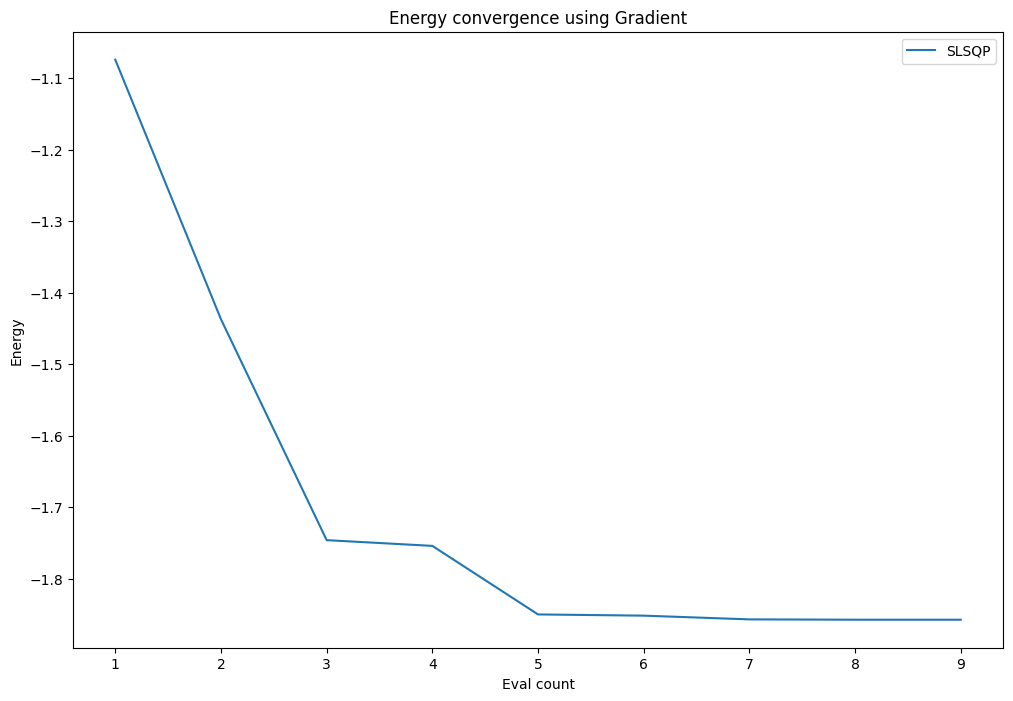

In [ ]:
import pylab
pylab.rcParams["figure.figsize"] = (12, 8)
pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence using Gradient")
pylab.legend(loc="upper right")